In [1]:
import pandas as pd

housing_data = pd.read_csv("housing_data_test_train.csv")

In [2]:
housing_data.head()


,Unnamed: 0.1,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,5,5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697


/Users/scottie/opt/anaconda3/envs/shooterModel/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/scottie/opt/anaconda3/envs/shooterModel/lib/python3.9/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/scottie/opt/anaconda3/envs/shooterModel/lib/python3.9/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


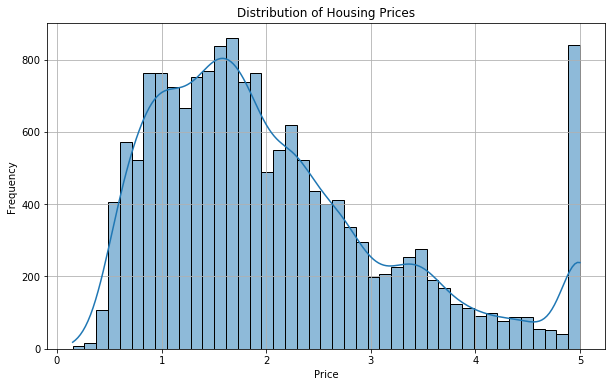

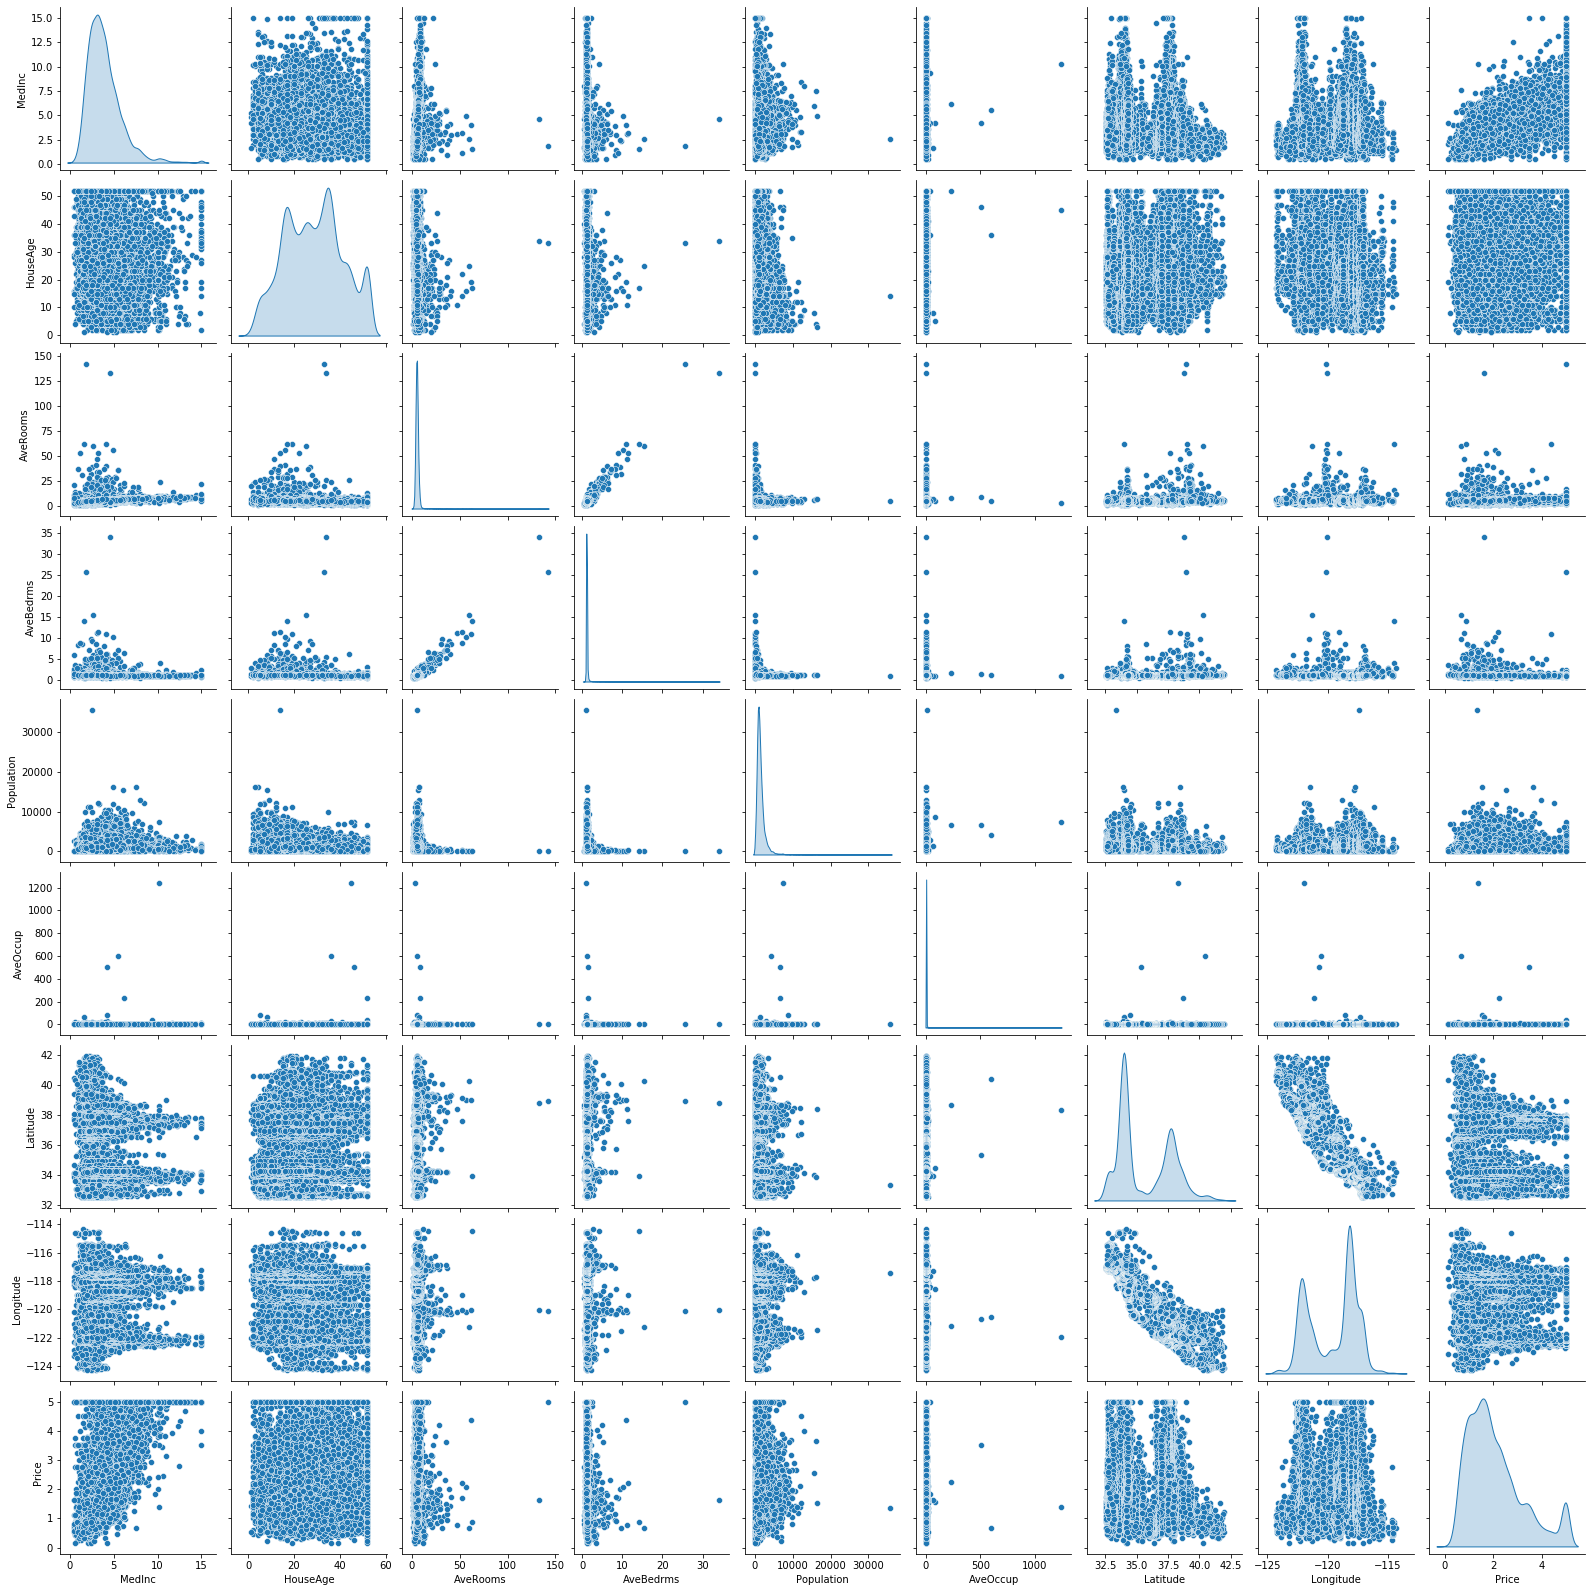

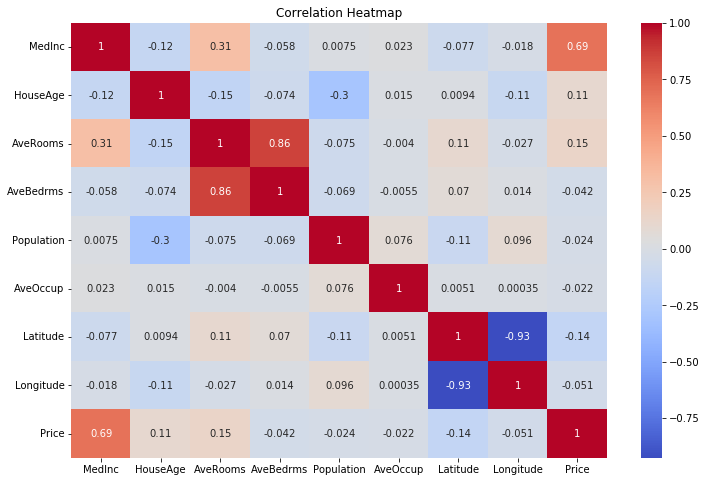

(Unnamed: 0.1    0
 Unnamed: 0      0
 MedInc          0
 HouseAge        0
 AveRooms        0
 AveBedrms       0
 Population      0
 AveOccup        0
 Latitude        0
 Longitude       0
 Price           0
 dtype: int64,
        Unnamed: 0.1    Unnamed: 0        MedInc      HouseAge      AveRooms  \
 count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
 mean   10344.188590  10344.188590      3.876149     28.604469      5.441114   
 std     5958.933738   5958.933738      1.891584     12.586046      2.613727   
 min        0.000000      0.000000      0.499900      1.000000      0.846154   
 25%     5168.750000   5168.750000      2.572050     18.000000      4.439906   
 50%    10345.500000  10345.500000      3.544550     29.000000      5.226528   
 75%    15520.250000  15520.250000      4.750000     37.000000      6.057778   
 max    20639.000000  20639.000000     15.000100     52.000000    141.909091   
 
           AveBedrms    Population      AveOccup      

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = housing_data.isnull().sum()

# Descriptive statistics
descriptive_stats = housing_data.describe()

# Distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['Price'], kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Pairplot to understand relationships between variables
sns.pairplot(housing_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1']), diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(housing_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

missing_values, descriptive_stats



In [4]:
# Check current column names in the DataFrame
current_columns = housing_data.columns
current_columns

# Drop the unnecessary columns if they exist in the DataFrame
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
columns_to_drop = [col for col in columns_to_drop if col in current_columns]
housing_data_fe = housing_data.drop(columns=columns_to_drop)

# Recreate the new features
housing_data_fe['RoomsPerHousehold'] = housing_data_fe['AveRooms'] / housing_data_fe['AveOccup']
housing_data_fe['BedroomsPerRoom'] = housing_data_fe['AveBedrms'] / housing_data_fe['AveRooms']
housing_data_fe['PopulationPerHousehold'] = housing_data_fe['Population'] / housing_data_fe['AveOccup']

# Check the revised DataFrame
housing_data_fe.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,1138.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,177.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,219.0
4,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,2.225182,0.231774,193.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Handling outliers by capping
# For simplicity, we'll cap values at the 1st and 99th percentiles
for col in housing_data_fe.columns:
    percentiles = housing_data_fe[col].quantile([0.01, 0.99]).values
    housing_data_fe[col] = np.clip(housing_data_fe[col], percentiles[0], percentiles[1])

# Splitting the data into features (X) and target (y)
X = housing_data_fe.drop('Price', axis=1)
y = housing_data_fe['Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking multicollinearity
correlation_matrix = pd.DataFrame(X_train_scaled, columns=X.columns).corr()

# Display the correlation matrix
correlation_matrix



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold
MedInc,1.000000,-0.134149,0.627056,-0.147465,0.005049,-0.064599,-0.081350,-0.015091,0.451074,-0.670744,0.012835
HouseAge,-0.134149,1.000000,-0.233220,-0.142645,-0.304098,-0.002412,0.008802,-0.104401,-0.145764,0.142887,-0.305336
AveRooms,0.627056,-0.233220,1.000000,0.415317,-0.089381,-0.044279,0.124335,-0.054428,0.724174,-0.783671,-0.103794
AveBedrms,-0.147465,-0.142645,0.415317,1.000000,-0.092101,-0.117332,0.081248,0.033658,0.451899,0.155433,-0.056521
Population,0.005049,-0.304098,-0.089381,-0.092101,1.000000,0.205876,-0.111241,0.098875,-0.212598,0.059817,0.906208
AveOccup,-0.064599,-0.002412,-0.044279,-0.117332,0.205876,1.000000,-0.162273,0.172531,-0.663291,-0.005854,-0.146872
Latitude,-0.081350,0.008802,0.124335,0.081248,-0.111241,-0.162273,1.000000,-0.927512,0.177647,-0.120697,-0.066914
Longitude,-0.015091,-0.104401,-0.054428,0.033658,0.098875,0.172531,-0.927512,1.000000,-0.131746,0.100765,0.047237
RoomsPerHousehold,0.451074,-0.145764,0.724174,0.451899,-0.212598,-0.663291,0.177647,-0.131746,1.000000,-0.495902,0.007750
BedroomsPerRoom,-0.670744,0.142887,-0.783671,0.155433,0.059817,-0.005854,-0.120697,0.100765,-0.495902,1.000000,0.090086


In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor()
}

# Dictionary to store RMSE for each model
rmse_scores = {}

# Train each model and compute RMSE
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE
    rmse_scores[name] = rmse

# Display the RMSE scores
rmse_scores



{'Linear Regression': 0.6306522727530723,
 'Ridge Regression': 0.6306512040442718,
 'Lasso Regression': 1.1223014257821908,
 'Elastic Net Regression': 0.9923583017666103,
 'Random Forest Regressor': 0.5066045317692891}

In [7]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Perform Grid Search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and corresponding RMSE
best_params = grid_search.best_params_
best_rmse = mean_squared_error(y_test, grid_search.predict(X_test_scaled), squared=False)

#best_params, best_rmse



In [8]:
rf = RandomForestRegressor(
    n_estimators=150,     
    max_depth=20,     
    min_samples_split=4, 
    min_samples_leaf=2,
)

In [9]:
rf.fit(X,y)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=150)

In [23]:
def evaluate_model(model, dataset):
    """
    Evaluates the given model on the provided dataset and returns the accuracy of predictions.

    :param model: A trained regression model.
    :param dataset: A DataFrame with the same structure as the original dataset used to train the model.
    :return: Accuracy of the model on the new dataset.
    """
    try:
        # Preprocessing the dataset like the original dataset
        # Drop unnecessary columns, create new features, handle outliers, and scale
        if 'Unnamed: 0' in dataset.columns:
            dataset = dataset.drop(columns='Unnamed: 0')
        if 'Unnamed: 0.1' in dataset.columns:
            dataset = dataset.drop(columns='Unnamed: 0.1')

        # Creating new features
        dataset['RoomsPerHousehold'] = dataset['AveRooms'] / dataset['AveOccup']
        dataset['BedroomsPerRoom'] = dataset['AveBedrms'] / dataset['AveRooms']
        dataset['PopulationPerHousehold'] = dataset['Population'] / dataset['AveOccup']

        # Handling outliers by capping
        for col in dataset.columns:
            percentiles = dataset[col].quantile([0.01, 0.99]).values
            dataset[col] = np.clip(dataset[col], percentiles[0], percentiles[1])

        # Splitting the data into features (X) and target (y)
        X = dataset.drop('Price', axis=1)
        y = dataset['Price']

        # Scaling the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Making predictions and calculating accuracy
        y_pred = model.predict(X_scaled)
        r_squared = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)

        return r_squared,mse

    except Exception as e:
        return f"Error during model evaluation: {str(e)}"

# Example usage (assuming 'model' is a trained model and 'new_data' is a new dataset with the same structure):
# accuracy = evaluate_model(model, new_data)
# print("Model Accuracy:", accuracy)



In [21]:
eval_data = pd.read_csv("housing_data_holdout_set.csv")

In [13]:
evaluate_model(rf, eval_data)

/Users/scottie/opt/anaconda3/envs/UBIQ/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(-0.11026621422505545, 1.453894246637622)

In [18]:
#import pickle
#with open('MODEL_B.pkl', 'wb') as file:
#    pickle.dump(rf, file)

In [22]:
with open('MODEL_B.pkl', 'rb') as file:
    model_B = pickle.load(file)

In [24]:
evaluate_model(model_B, eval_data)

/Users/scottie/opt/anaconda3/envs/UBIQ/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(-0.11026621422505545, 1.453894246637622)

In [ ]:
'''
FINAL MODEL B PERFORMANCE

{'R-squared': -0.11026621422505545, 'MSE': 1.453894246637622}

'''